In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from IPython import display

In [2]:
X, y = make_blobs(centers = 5, n_features = 4, n_samples = 5000,
                 random_state = 29)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

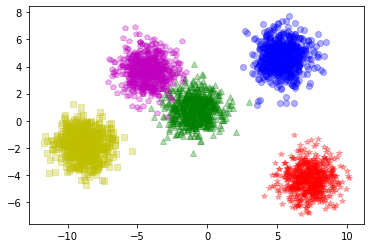

In [3]:
plt.plot(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], 'r*', alpha = 0.3)
plt.plot(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], 'g^', alpha = 0.3)
plt.plot(X_train[:, 0][y_train == 2], X_train[:, 1][y_train == 2], 'bo', alpha = 0.3)
plt.plot(X_train[:, 0][y_train == 3], X_train[:, 1][y_train == 3], 'ys', alpha = 0.3)
plt.plot(X_train[:, 0][y_train == 4], X_train[:, 1][y_train == 4], 'mp', alpha = 0.3)

In [4]:
X_range = []
accuracy_points = []
rmse_points = []
mae_points = []

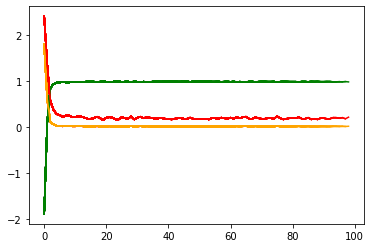

In [5]:
fig = plt.figure(figsize = (6, 4))
axs = fig.add_subplot(1, 1, 1)

axs.plot(0, 0, 'green')
axs.plot(0, 0, 'red')
axs.plot(0, 0, 'orange')

count = 0
depth = 1
leaf_nodes = 2

for estimators in range(1, 100):
    clf = RandomForestClassifier(n_estimators = estimators,
                                max_depth = depth,
                                max_leaf_nodes = leaf_nodes)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    X_range.append(count)
    accuracy_points.append(r2_score(y_test, y_pred))
    rmse_points.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_points.append(mean_absolute_error(y_test, y_pred))

    count += 1
    depth += 1
    leaf_nodes += 1

    axs.plot(X_range, accuracy_points, 'green')
    axs.plot(X_range, rmse_points, 'red')
    axs.plot(X_range, mae_points, 'orange')

    display.display(plt.gcf())
    display.clear_output(wait = True)